# **Submission**

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

## **EDA**

In [ ]:
df = pd.read_csv("Dejo Osejoro - data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include = "all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


## **Data Preprocessing**

In [ ]:
# Removing irrelevant rows
df.drop(columns = "id",inplace = True)
pass

In [ ]:
# Encoding the diagnosis column
df["diagnosis"] = df["diagnosis"].replace({"B":0,"M":1})

### Descriptive Analysis.

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: xlabel='diagnosis'>

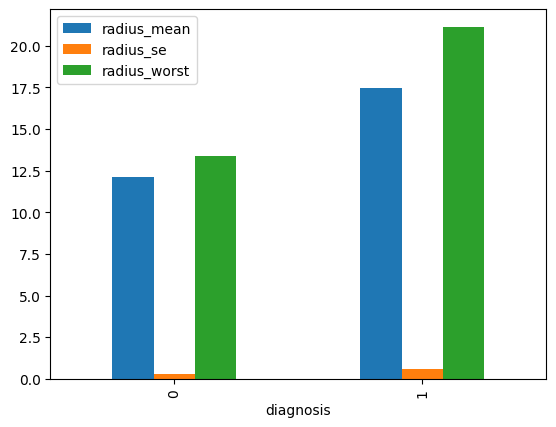

In [ ]:
df.groupby("diagnosis")[['radius_mean','radius_se','radius_worst']].mean().plot(kind = "bar")

<Axes: xlabel='diagnosis'>

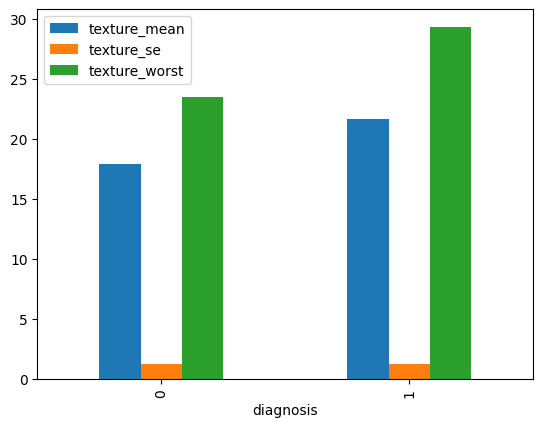

In [ ]:
df.groupby("diagnosis")[['texture_mean','texture_se','texture_worst']].mean().plot(kind = "bar")

<Axes: xlabel='diagnosis'>

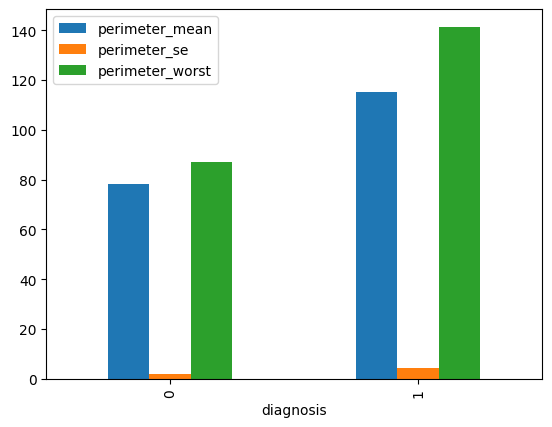

In [ ]:
df.groupby("diagnosis")[['perimeter_mean','perimeter_se','perimeter_worst']].mean().plot(kind = "bar")

<Axes: xlabel='diagnosis'>

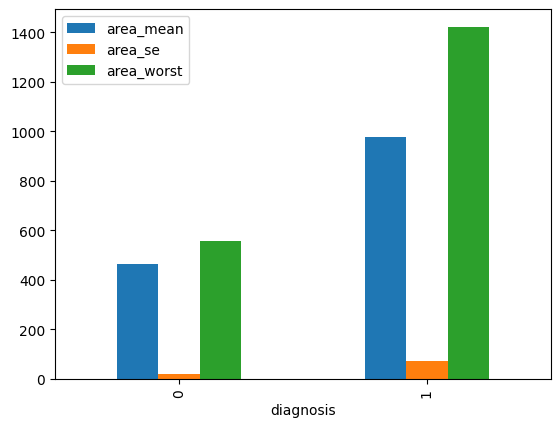

In [ ]:
df.groupby("diagnosis")[['area_mean','area_se','area_worst']].mean().plot(kind = "bar")

In [ ]:
X = df.drop(columns = ['diagnosis','radius_mean', 'concavity_worst', 'compactness_worst',
       'area_worst', 'symmetry_se', 'concavity_se', 'compactness_se',
       'symmetry_worst', 'perimeter_se', 'radius_se',
       'fractal_dimension_worst', 'symmetry_mean', 'perimeter_mean',
       'area_mean', 'concavity_mean', 'compactness_mean',
       'fractal_dimension_mean', 'smoothness_mean','texture_mean', 'texture_se'])
y = df["diagnosis"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

print(f"The shape of X is {X.shape}")
print(f"The shape of y is {y.shape}")

The shape of X is (569, 10)
The shape of y is (569,)


## **Model 1**

### **Model Initialization**

In [ ]:
model1 = DecisionTreeClassifier( max_depth = 5, random_state = 42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Visualizing the Decision Tree

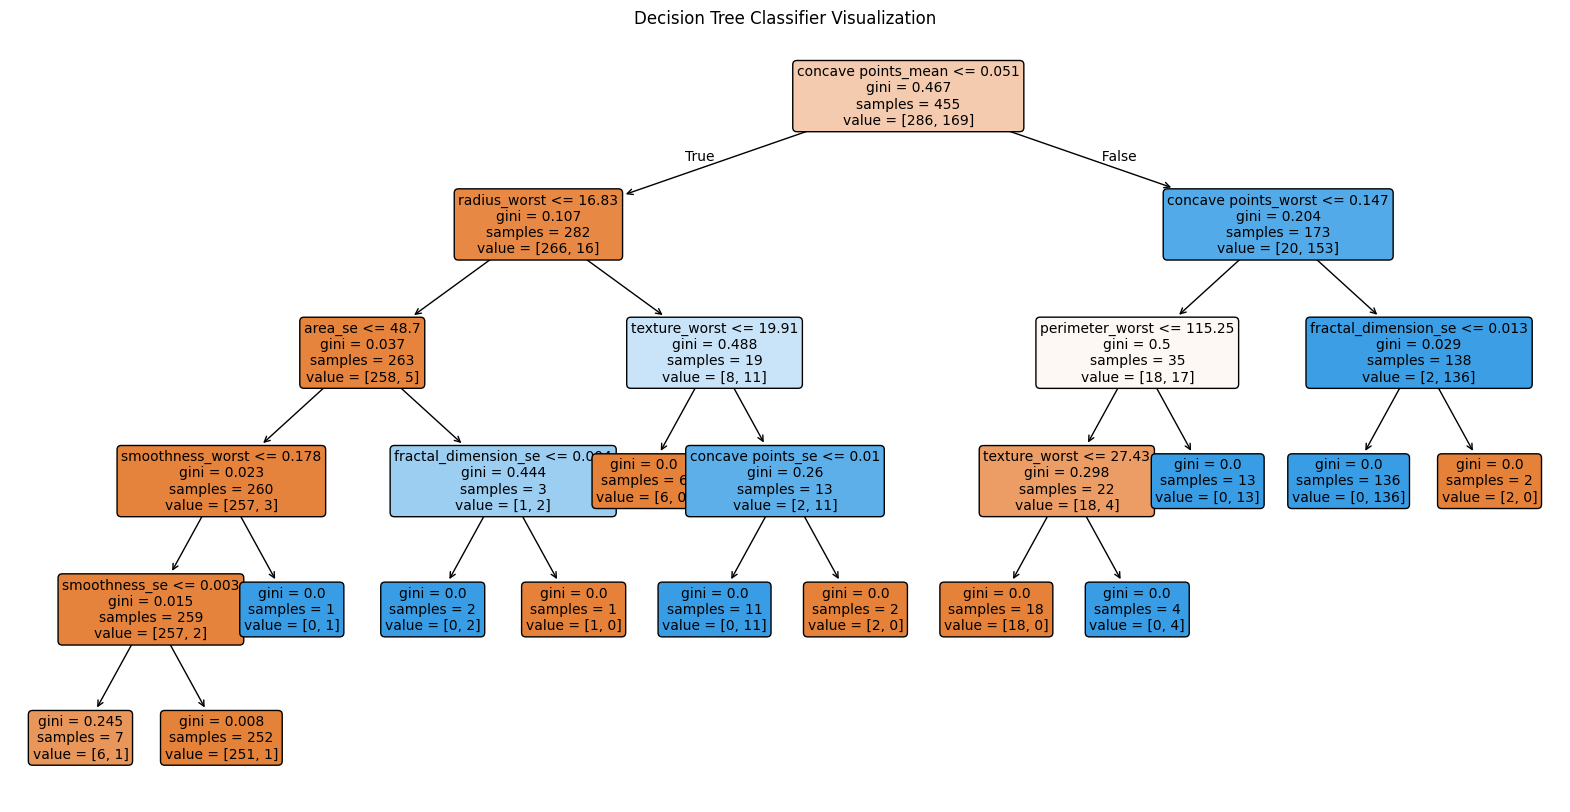

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model1, feature_names=X.columns,  filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Classifier Visualization")
plt.show()

### **Prediction and Metrics**

In [ ]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
print("Done!")

Done!


#### **Metrics**

Training Accuracy: 0.9956043956043956
Test Accuracy: 0.9385964912280702

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



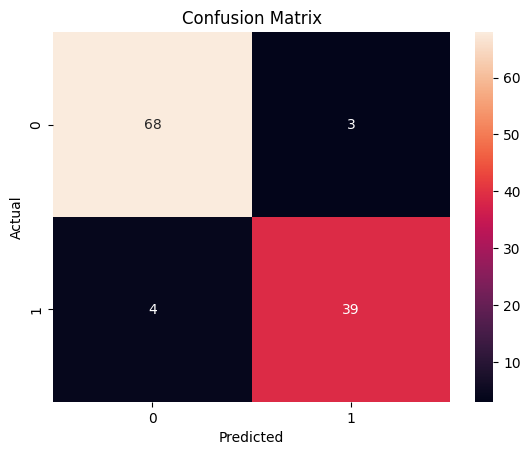

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred,labels = [0,1])
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Feature Importance**
Since i did not investigate due to the large number of features i'll be checking for the most important features.

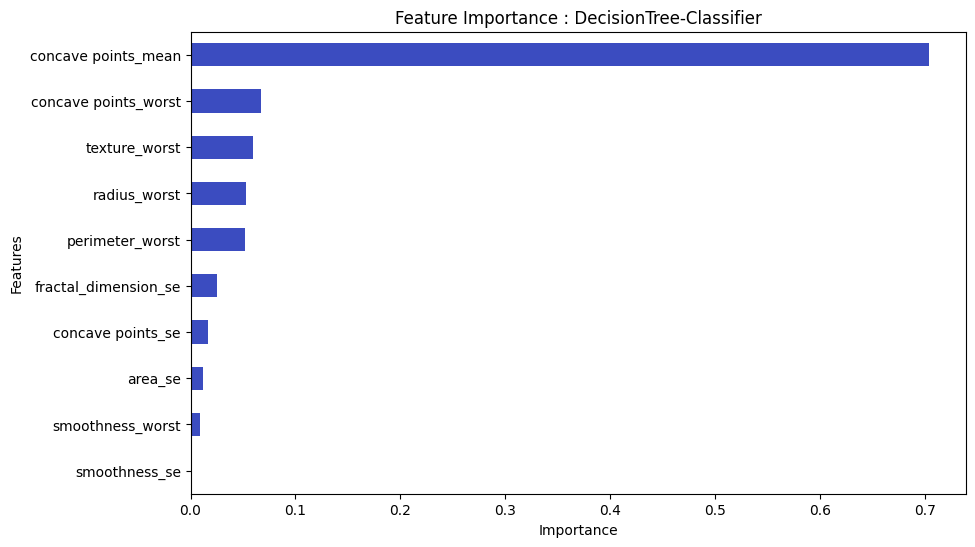

In [ ]:
# Feature importance
importances = pd.Series(model1.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 6), title='Feature Importance : DecisionTree-Classifier', cmap = "coolwarm")
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

In [ ]:
f_importance = importances.sort_values(ascending=True)
f_importance

smoothness_se           0.001259
smoothness_worst        0.009397
area_se                 0.012195
concave points_se       0.016214
fractal_dimension_se    0.025271
perimeter_worst         0.052408
radius_worst            0.053228
texture_worst           0.059516
concave points_worst    0.066816
concave points_mean     0.703696
dtype: float64

In [ ]:
f_importance = pd.DataFrame(f_importance)

In [ ]:
f_importance.reset_index(inplace = True)

In [ ]:
f_importance

,index,0
0,smoothness_se,0.001259
1,smoothness_worst,0.009397
2,area_se,0.012195
3,concave points_se,0.016214
4,fractal_dimension_se,0.025271
5,perimeter_worst,0.052408
6,radius_worst,0.053228
7,texture_worst,0.059516
8,concave points_worst,0.066816
9,concave points_mean,0.703696


In [ ]:
(f_importance[f_importance[0] == 0])["index"].unique()

array([], dtype=object)

In [ ]:
#Least Important Features
(f_importance.head(5))["index"].unique()

array(['smoothness_se', 'smoothness_worst', 'area_se',
       'concave points_se', 'fractal_dimension_se'], dtype=object)

In [ ]:
#Most Important Features
f_importance.sort_values(ascending=False, by = 0).head()

,index,0
9,concave points_mean,0.703696
8,concave points_worst,0.066816
7,texture_worst,0.059516
6,radius_worst,0.053228
5,perimeter_worst,0.052408


In [ ]:
#Most Important Feature Names
f_importance.sort_values(ascending=False, by = 0).head()["index"].unique()

array(['concave points_mean', 'concave points_worst', 'texture_worst',
       'radius_worst', 'perimeter_worst'], dtype=object)

## **Model 2 - RandomForestClassifier**

In [ ]:
X = df.drop(columns = ["diagnosis",'concave points_se', 'symmetry_mean', 'fractal_dimension_mean'])
y = df["diagnosis"]

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
model2 = RandomForestClassifier(random_state = 42,)
model2.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

Training Accuracy: 1.0
Test Accuracy: 0.9649122807017544

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



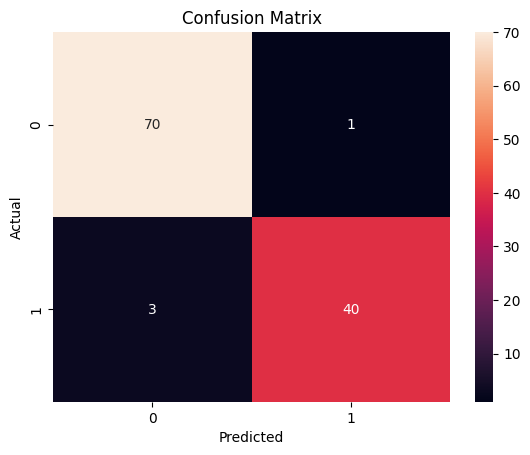

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred2))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred2))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred2))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred2,labels = [0,1])
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

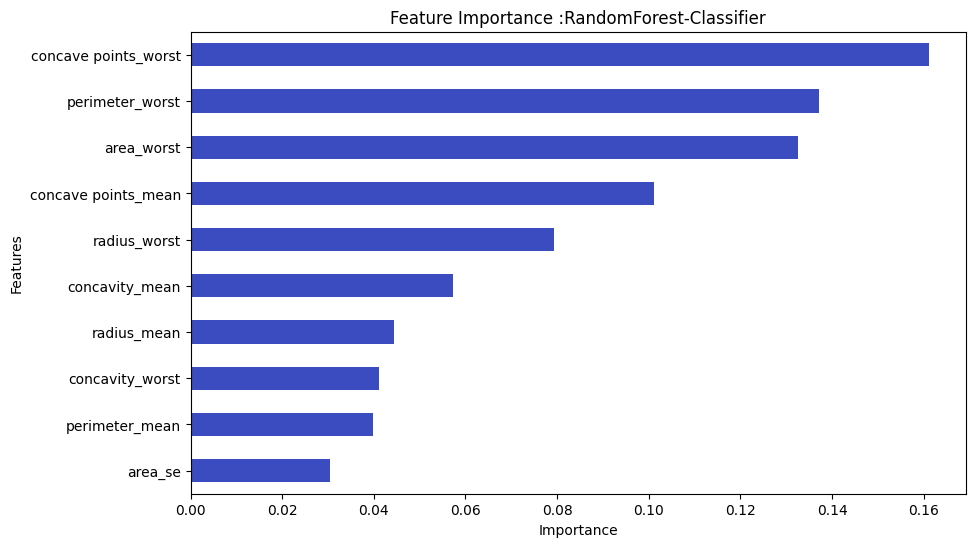

In [ ]:
importances = pd.Series(model2.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 6), title='Feature Importance :RandomForest-Classifier', cmap = "coolwarm")
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

In [ ]:
f_importance = importances.sort_values(ascending=True)

In [ ]:
f_importance = pd.DataFrame(f_importance)
f_importance.reset_index(inplace = True)

In [ ]:
# Least important features
(f_importance.head(5))["index"].unique()

array(['smoothness_se', 'perimeter_se', 'compactness_se',
       'compactness_mean', 'symmetry_se'], dtype=object)

In [ ]:
#Most Important Features
f_importance.sort_values(ascending=False, by = 0).head()

,index,0
26,concave points_worst,0.161068
25,perimeter_worst,0.137137
24,area_worst,0.132533
23,concave points_mean,0.101092
22,radius_worst,0.079421


In [ ]:
#Most Important Features Names
f_importance.sort_values(ascending=False, by = 0).head()["index"].unique()

array(['concave points_worst', 'perimeter_worst', 'area_worst',
       'concave points_mean', 'radius_worst'], dtype=object)

# **Summary**

### **Model Description**

##### **Algorithm**
1. The first model was a DecisionTreeClassifier
2. The Second Model which is my preferred model is The RandomForestClassifier.

##### Preprocessing
- Dropped the `id` column to avoid a bias in prediction which i noticed when it was included.
- The `diagnosis` column was encoded as a numeric data type to enable processing.

### **Evaluation**

#### **Metrics**
**See Classification Report & Confusion Matrix for both Models**
- The `macro_avg` of the `f1_score` for the **DecisionTreeClassifier** is 0.93 as compared to 0.96 for the **RandomForestClassifier**.
- From the confusion matrix we can clearly see that the **RandomForestClassifier** performed better overall.
**Best Model** : Based on the metrics as seen in the code, The **RandomForestClassifier** performed better and didnt require tuning yet it still gave the best performance.

#### **Feature Importance**
1.**Most Important Feature** :`concave points_mean` was the most important feature for the **DecisionTreeClassifier** but for The **RandomForestClassifier** the `area_complexity` was the most important feature
2.**Common Features that the two models share** : `concave points_worst`,`perimeter_worst`,`concave points_mean`, `radius_worst` were noticed as big pointers in both models. It is safe to say that they kinda determine the cases.

### **Analysis**
I visualized columns with similar prefixes which were  grouped by the `diagnosis` column, in order to find some patterns.
- I realized that columns with the suffix **_se** where showing little or no impact on the target variable(**See bar graphs for more info**).
- This same thing was noticed in the Feature importance pandas series for both models.
- Using the feature importance i dropped columns that had no effect on the model prediction to avoid inefficiency.
  
**Thanks**